## What is the Monte Carlo Method?

The Monte Carlo method is a technique that uses randomness (random sampling) to solve problems that might be too complex to solve exactly. Think of it like running a lot of simulations using random inputs to estimate an answer.

🚗 Everyday Analogy:

* Imagine you want to find how long it takes to drive to work, but traffic varies. 
* Instead of solving it with math, you simulate the trip 1000 times, randomly picking:

   * Traffic conditions
   * Stoplight delays
   * Weather

Then you <b> <i> average </i> </b> the trip times. 

#### That’s a Monte Carlo method—run lots of trials with randomness, and average the results.
________________________________________________________________________________________________________________________

### 🔍 A Bit Deeper: How Does it Work?
Monte Carlo methods follow these general steps:

* Define a problem that can be represented with probability or randomness.
* Generate a large number of random samples (simulations).
* Calculate the result of each simulation.
* Aggregate the results (mean, median, variance) to estimate the final answer.

_________________________________________________________________

### 🎲 Classic Example: Estimating π (Pi)
Here’s a fun and famous Monte Carlo example:

Goal: Estimate the value of π

* Draw a square (length = 2) with a circle of radius 1 inside it.
* Randomly throw points into the square (like throwing darts).
* Count how many land inside the circle.
* Ratio of points in circle to total points ≈ π / 4.


### So:   π ≈ 4 × ( Points in Circle / Total Points)

The more points you throw, the closer the estimate is to the real value of π.

### 🧠 Why Use Monte Carlo?
Monte Carlo methods are helpful when:

* The problem is too complex to solve with exact formulas.
* You need to estimate probabilities or expectations.
* You're working with systems involving uncertainty (finance, risk, physics, etc.).

📊 Real-World Use Cases
* Finance: Estimate risk or simulate stock price changes.
* Physics: Simulate particle interactions.
* AI/ML: Uncertainty estimation, hyperparameter search.
* Games: Monte Carlo Tree Search (used in AlphaGo).
* Forecasting: Predicting business outcomes with variable assumptions.

## ✅ Summary
* Monte Carlo = random simulations + averaging results
* Great for problems with uncertainty or complexity
* More simulations = better estimates (law of large numbers)

In [26]:
import math
import numpy as np
import random

# Monte Carlo process: Find random points (x, y) such that x^2 + y^2 <= 1. This will give us all the points within the circle

def monte_carlo_estimate_pie(num_samples):
    '''
        returns estimated pie value based on the monte_carlo process
    '''
    point_inside_querter_circle_count = 0

    for _ in range(num_samples):
        x = random.uniform(0, 1) # we could also use random.random() - it defauls to (0,1)
        y = random.uniform(0, 1)

        if x**2 + y**2 <=1:
            point_inside_querter_circle_count += 1
    
    pi_estimate = 4 * (point_inside_querter_circle_count/num_samples)

    return pi_estimate

monte_carlo_estimate_pie(100_000_00)

3.1417312

## Monte-Carlo use-case in AI/ML:
* Monte Carlo methods are widely used in AI/ML, especially in areas involving uncertainty, decision making, and sampling from complex distributions.

### ✅ The Problem
In many ML systems (like medical diagnosis, autonomous driving, or fraud detection), it's not enough to just make a prediction — we also want to know:

* How confident is the model in this prediction?

Standard deep neural networks are often overconfident, even when they're wrong.

### 🧠 The Monte Carlo Solution: MC Dropout
<b> MC Dropout </b> is a Monte Carlo-based technique to estimate predictive uncertainty from a trained deep learning model.

How it works:

* Train a neural network with dropout enabled (a technique to randomly "drop" neurons during training).
* At inference time, instead of turning dropout off (as is standard), keep it on and make multiple forward passes.
* Each pass gives a slightly different prediction due to the random dropout.
* Take the mean and variance of the predictions.

📊 What Does It Give You?
* Mean prediction → Your final prediction
* Variance (spread) → Model uncertainty
* This is Monte Carlo in action:

You're sampling multiple predictions from a stochastic model and averaging them — just like estimating π!

### Let's walk through a full example where we:

* Train a deep neural network (on a small dataset, e.g., MNIST or synthetic)
* Use Monte Carlo Dropout to:
* Predict on test data multiple times
* Compute mean prediction and uncertainty
* Visualize results with confidence scores


#### 🔧 Step-by-Step: Monte Carlo Dropout for Uncertainty Estimation

We'll:

* Use a simple classification model with dropout
* Keep dropout enabled during inference
* Run N stochastic forward passes to get multiple predictions

### Use case-1:
A smaller synthetic dataset
A shallow neural network
Dropout + Monte Carlo prediction

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate toy dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Simple NN with Dropout
class MCDropoutNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout active in train *and inference*
        return F.log_softmax(self.fc2(x), dim=1)

model = MCDropoutNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

# Train
for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_fn(output, y_train)
    loss.backward()
    optimizer.step()

# MC Dropout Prediction
def mc_predict(model, x, n_iter=100):
    model.train()  # Enable dropout
    preds = []
    with torch.no_grad():
        for _ in range(n_iter):
            out = model(x)
            probs = out.exp()  # convert log-softmax to prob
            preds.append(probs.numpy())
    return np.array(preds)

# Choose a test point
i = 10
sample = X_test[i].unsqueeze(0)
true_label = y_test[i].item()

mc_preds = mc_predict(model, sample, n_iter=100)
mean_pred = mc_preds.mean(axis=0).squeeze()
std_pred = mc_preds.std(axis=0).squeeze()

print(f"True label: {true_label}")
print(f"Predicted probabilities: {mean_pred}")
print(f"Uncertainty (std dev): {std_pred}")
print(f"Predicted class: {np.argmax(mean_pred)}")


True label: 0
Predicted probabilities: [0.97877747 0.02122253]
Uncertainty (std dev): [0.03775593 0.03775593]
Predicted class: 0


### Use case-2: using a simple CNN on MNIST

* A simple CNN on MNIST
* Uses Monte Carlo Dropout for uncertainty estimation
* Predicts a single test image with mean prediction + standard deviation (uncertainty)
* Trains quickly (uses 10,000 training examples)

Epoch 1, Loss: 0.6402
Epoch 2, Loss: 0.2330

True Label: 7
Predicted Class: 7
Prediction Confidence: 0.9788
Prediction Uncertainty (std dev): 0.0538


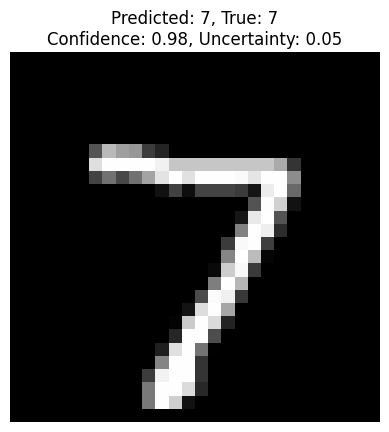

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Set device & random seed
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

# -------------------------------
# Load MNIST (small subset)
# -------------------------------
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_subset = Subset(train_data, range(10000))   # smaller set for speed
test_subset = Subset(test_data, range(1000))      # small test set

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=1, shuffle=False)

# -------------------------------
# CNN with Dropout
# -------------------------------
class MCDropoutCNN(nn.Module):
    def __init__(self):
        super(MCDropoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# -------------------------------
# Train the model
# -------------------------------
model = MCDropoutCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

def train(model, loader, optimizer, criterion, epochs=2):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader):.4f}")

train(model, train_loader, optimizer, criterion)

# -------------------------------
# Monte Carlo Dropout Inference
# -------------------------------
def mc_dropout_predict(model, x, n_iter=50):
    model.train()  # keep dropout active
    outputs = []
    with torch.no_grad():
        for _ in range(n_iter):
            out = model(x.to(device)).exp()  # convert log-probs to probs
            outputs.append(out.cpu().numpy())
    return np.array(outputs)

# -------------------------------
# Test on one image
# -------------------------------
model.eval()
sample_data, sample_target = next(iter(test_loader))
mc_outputs = mc_dropout_predict(model, sample_data, n_iter=50)

mean_probs = mc_outputs.mean(axis=0).squeeze()
std_probs = mc_outputs.std(axis=0).squeeze()
predicted_class = np.argmax(mean_probs)
confidence = mean_probs[predicted_class]
uncertainty = std_probs[predicted_class]

# -------------------------------
# Print results
# -------------------------------
print(f"\nTrue Label: {sample_target.item()}")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Confidence: {confidence:.4f}")
print(f"Prediction Uncertainty (std dev): {uncertainty:.4f}")

# -------------------------------
# Show the image
# -------------------------------
plt.imshow(sample_data.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}, True: {sample_target.item()}\nConfidence: {confidence:.2f}, Uncertainty: {uncertainty:.2f}")
plt.axis("off")
plt.show()


In [36]:
train_subset = Subset(train_data, range(10000))   # smaller set for speed
test_subset = Subset(test_data, range(1000))      # small test set

In [ ]:
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=1, shuffle=False)

# -------------------------------
# CNN with Dropout
# -------------------------------
class MCDropoutCNN(nn.Module):
    def __init__(self):
        super(MCDropoutCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


# -------------------------------
# Train the model
# -------------------------------
model = MCDropoutCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

def train(model, loader, optimizer, criterion, epochs=2):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader):.4f}")

train(model, train_loader, optimizer, criterion)



Epoch 1, Loss: 0.6402
Epoch 2, Loss: 0.2330



True Label: 7
Predicted Class: 7
Prediction Confidence: 0.9812
Prediction Uncertainty (std dev): 0.0518


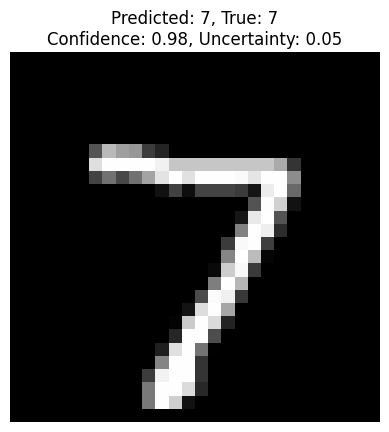

In [45]:
# -------------------------------
# Monte Carlo Dropout Inference
# -------------------------------
def mc_dropout_predict(model, x, n_iter=50):
    model.train()  # keep dropout active
    outputs = []
    with torch.no_grad():
        for _ in range(n_iter):
            out = model(x.to(device)).exp()  # convert log-probs to probs
            outputs.append(out.cpu().numpy())
    return np.array(outputs)

# -------------------------------
# Test on one image
# -------------------------------
model.eval()
sample_data, sample_target = next(iter(test_loader))
mc_outputs = mc_dropout_predict(model, sample_data, n_iter=50)

mean_probs = mc_outputs.mean(axis=0).squeeze()
std_probs = mc_outputs.std(axis=0).squeeze()
predicted_class = np.argmax(mean_probs)
confidence = mean_probs[predicted_class]
uncertainty = std_probs[predicted_class]

# -------------------------------
# Print results
# -------------------------------
print(f"\nTrue Label: {sample_target.item()}")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Confidence: {confidence:.4f}")
print(f"Prediction Uncertainty (std dev): {uncertainty:.4f}")

# -------------------------------
# Show the image
# -------------------------------
plt.imshow(sample_data.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}, True: {sample_target.item()}\nConfidence: {confidence:.2f}, Uncertainty: {uncertainty:.2f}")
plt.axis("off")
plt.show()

In [ ]:
mc_outputs

array([[[2.05288501e-07, 9.50033723e-08, 1.66580975e-07, 1.37258729e-03,
         2.44929166e-09, 1.85733082e-08, 2.07574313e-09, 9.96424258e-01,
         1.98509409e-09, 2.20274483e-03]],

       [[1.63366822e-05, 4.47679227e-08, 3.60153615e-04, 1.27663327e-04,
         4.93286691e-08, 6.64043043e-08, 4.59402516e-09, 9.98993456e-01,
         5.25425776e-07, 5.01714472e-04]],

       [[2.37154985e-09, 1.64310907e-14, 1.84906412e-07, 3.87268083e-05,
         8.01384078e-13, 4.10079175e-12, 9.24767702e-16, 9.99954820e-01,
         2.91057152e-12, 6.25799112e-06]],

       [[3.01639775e-05, 9.83198674e-07, 5.44551387e-03, 3.40569322e-03,
         1.82880763e-06, 1.94298673e-06, 7.65148223e-10, 9.89125967e-01,
         1.97801812e-04, 1.79019989e-03]],

       [[1.40668519e-04, 2.85911101e-05, 3.25207599e-03, 2.33905092e-02,
         1.10754463e-05, 8.09250139e-07, 1.13863609e-06, 9.55936015e-01,
         1.13956767e-05, 1.72278285e-02]],

       [[5.62852698e-08, 2.58949251e-11, 1.6278500

array([1.4301308e-04, 3.7777220e-06, 1.4538239e-03, 1.3833474e-02,
       3.0576680e-06, 8.2911965e-06, 6.0222726e-07, 9.7879815e-01,
       4.4051179e-05, 5.7117902e-03], dtype=float32)